# Acerca del proyecto

**Descripción:**

Este dataset contiene datos sintéticos diseñados para predecir la edad en función de diversos factores de salud y estilo de vida. Incluye 3000 filas con 24 columnas, cada una de las cuales representa diferentes aspectos de la salud física y el estilo de vida.

El desafío es predecir la edad máxima de la persona a través de un modelo de regresión, buscando relaciones entre métricas de salud y la edad.

**Columnas:**

*   **Height (cm):** La altura del individuo en centímetros.
*   **Weight (kg):** El peso del individuo en kilogramos.
*   **Blood Pressure (s/d):** Presión arterial (sistólica/diastólica) en mmHg.
*   **Cholesterol Level (mg/dL):** Nivel de colesterol en miligramos por decilitro.
*   **BMI:** Índice de Masa Corporal, calculado a partir de la altura y el peso.
*   **Blood Glucose Level (mg/dL):** Nivel de glucosa en sangre en miligramos por decilitro.
*   **Bone Density (g/cm²):** Densidad ósea en gramos por centímetro cuadrado.
*   **Vision Sharpness:** Nitidez de la visión en una escala de 0 (borrosa) a 100 (perfecta).
*   **Hearing Ability (dB):** Capacidad auditiva en decibeles.
*   **Physical Activity Level:** Categorizado como "bajo", "moderado" o "alto".
*   **Smoking Status:** Valores categóricos que incluyen "Nunca", "Anterior" y "Actual".
*   **Alcohol Consumption:** Frecuencia de consumo de alcohol.
*   **Diet:** Tipo de dieta, categorizada como 'Equilibrada', 'Alta en Proteínas', 'Baja en Carbohidratos', etc.
*   **Chronic Diseases:** Presencia de enfermedades crónicas (p. ej., diabetes, hipertensión).
*   **Medication Use:** Uso de medicamentos.
*   **Family History:** Presencia de antecedentes familiares de condiciones relacionadas con la edad.
*   **Cognitive Function:** Función cognitiva autoinformada en una escala de 0 (mala) a 100 (excelente).
*   **Mental Health Status:** Estado de salud mental autoinformado en una escala de 0 (malo) a 100 (excelente).
*   **Sleep Patterns:** Número promedio de horas de sueño por noche.
*   **Stress Levels:** Niveles de estrés autoinformados en una escala de 0 (bajo) a 100 (alto).
*   **Pollution Exposure:** Exposición a la contaminación medida en unidades arbitrarias.
*   **Sun Exposure:** Exposición promedio al sol en horas por semana.
*   **Education Level:** Nivel más alto de educación alcanzado.
*   **Income Level:** Ingresos anuales en USD.
*   **Age (years):** La variable objetivo que representa la edad del individuo.

# Importe de librerías y dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Link https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset?select=Train.csv

url = 'https://raw.githubusercontent.com/jp-quevedo/data-science-1/refs/heads/main/Train.csv' # Edad de fallecimiento
df = pd.read_csv(url, sep = ',')
columns = df.columns
df.head(1)

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.2,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89


# Revisión del dataframe

In [3]:
#
df.shape

(3000, 26)

In [4]:
#
df.dtypes

,0
Gender,object
Height (cm),float64
Weight (kg),float64
Blood Pressure (s/d),object
Cholesterol Level (mg/dL),float64
BMI,float64
Blood Glucose Level (mg/dL),float64
Bone Density (g/cm²),float64
Vision Sharpness,float64
Hearing Ability (dB),float64


In [5]:
#
df.isnull().sum()

,0
Gender,0
Height (cm),0
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,0
Blood Glucose Level (mg/dL),0
Bone Density (g/cm²),0
Vision Sharpness,0
Hearing Ability (dB),0


In [6]:
#
df['Gender'].value_counts()

,count
Gender,
Female,1511
Male,1489


In [7]:
#
df['Physical Activity Level'].value_counts()

,count
Physical Activity Level,
Moderate,1407
Low,902
High,691


In [8]:
#
df['Smoking Status'].value_counts()

,count
Smoking Status,
Former,1181
Never,1026
Current,793


In [9]:
#
df['Alcohol Consumption'].value_counts()

,count
Alcohol Consumption,
Occasional,1057
Frequent,742


In [10]:
#
df['Diet'].value_counts()

,count
Diet,
Balanced,1183
High-fat,662
Low-carb,605
Vegetarian,550


In [11]:
#
df['Chronic Diseases'].value_counts()

,count
Chronic Diseases,
Hypertension,676
Diabetes,532
Heart Disease,493


In [12]:
#
df['Medication Use'].value_counts()

,count
Medication Use,
Regular,1063
Occasional,739


In [13]:
#
df['Family History'].value_counts()

,count
Family History,
Diabetes,645
Heart Disease,453
Hypertension,451


In [14]:
#
df['Mental Health Status'].value_counts()

,count
Mental Health Status,
Good,1073
Fair,1009
Poor,479
Excellent,439


In [15]:
#
df['Sleep Patterns'].value_counts()

,count
Sleep Patterns,
Normal,1519
Insomnia,1053
Excessive,428


In [16]:
#
df['Education Level'].value_counts()

,count
Education Level,
Undergraduate,884
High School,883
Postgraduate,606


In [17]:
#
df['Income Level'].value_counts()

,count
Income Level,
Medium,1223
Low,916
High,861


# Tratamiento de valores nulos

Este dataset tiene tan solo 3000 filas por lo que en lugar de eliminar los valores nulos, optaré por imputarlos con criterios según la columna.

### Alcohol Consumption

In [18]:
#
df['Alcohol Consumption'].isnull().sum()

1201

In [19]:
#
df['Alcohol Consumption'].value_counts()

,count
Alcohol Consumption,
Occasional,1057
Frequent,742


Al no tener categorías de "ex consumidor" o "nunca ha consumido" y observando una moda en "Occasional" asumiré que toda la muestra consume alcohol, y los valores nulos serán imputados por la moda.

In [20]:
#
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna('Occasional')

In [21]:
#
df['Alcohol Consumption'].isnull().sum()

0

### Chronic Diseases

In [22]:
#
df['Chronic Diseases'].isnull().sum()

1299

In [23]:
#
df['Chronic Diseases'].isnull().sum()/df.shape[0]

0.433

In [24]:
#
df['Chronic Diseases'].value_counts()/df.shape[0]

,count
Chronic Diseases,
Hypertension,0.225333
Diabetes,0.177333
Heart Disease,0.164333


El mayor porcentaje de respuestas en esta columna son valores nulos, por lo que entenderé los valores nulos significan que la persona no padece ninguna de estas enfermedades, y esta columna será tratada con dummies más adelante dada su característica no numérica.

### Medication Use

In [25]:
#
df['Medication Use'].isnull().sum()

1198

In [26]:
#
df['Medication Use'].value_counts()

,count
Medication Use,
Regular,1063
Occasional,739


In [27]:
#
df['Family History'].isnull().sum()/df.shape[0]

0.4836666666666667

In [28]:
#
df['Mental Health Status'].mode()

,Mental Health Status
0,Good


In [29]:
#
df['Sleep Patterns'].mode()

,Sleep Patterns
0,Normal


In [30]:
#
df['Stress Levels'].mean()

5.47650701880528

In [31]:
#
df['Stress Levels'].min()

1.0004278505451207

In [32]:
#
df['Stress Levels'].max()

9.996322570662096

Entenderé que en esta muestra el uso de medicamentos es de manera exclusiva para el tratamiento de enfermedades, por lo que el ámbito de la alimentación no será considerado para el criterio de imputación.
*   La mayoría del dataset tiene valores nulos en esta columna.
*   La mayoría del dataset no tiene enfermedades crónicas.
*   El 48% de las filas no acusa un historial familiar de enfermedades.
*   La mayoría del dataset tiene un estado de salud mental bueno.
*   La mayoría del dataset tiene un patrón de sueño normal.
*   La mayoría del dataset tiene un nivel de estrés promedio.
---
Dados estos antecedentes, considero que utilizar el criterio de moda para imputar no sería representativo de la muestra, por lo que trabajaré con la variable "Occasional".

In [33]:
#
df['Medication Use'] = df['Medication Use'].fillna('Occasional')

In [34]:
#
df['Medication Use'].isnull().sum()

0

### Family History

In [35]:
#
df['Family History'].isnull().sum()

1451

In [36]:
#
df['Family History'].value_counts()

,count
Family History,
Diabetes,645
Heart Disease,453
Hypertension,451


Dadas sus similitudes, utilizaré el mismo criterio y método que en la columna "Chronic Diseases"

### Education Level

In [37]:
#
df['Education Level'].isnull().sum()

627

In [38]:
#
df['Education Level'].value_counts()

,count
Education Level,
Undergraduate,884
High School,883
Postgraduate,606


In [39]:
#
df['Age (years)'].mean()

53.48566666666667

Dada la moda de esta columna y edad promedio de la muestra, imputaré los valores nulos con la moda.

In [40]:
#
df['Education Level'] = df['Education Level'].fillna('Undergraduate')

In [41]:
#
df['Education Level'].isnull().sum()

0

In [42]:
#
df['Education Level'].value_counts()

,count
Education Level,
Undergraduate,1511
High School,883
Postgraduate,606


### Revisión final de valores nulos

In [43]:
#
df.isnull().sum()

,0
Gender,0
Height (cm),0
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,0
Blood Glucose Level (mg/dL),0
Bone Density (g/cm²),0
Vision Sharpness,0
Hearing Ability (dB),0


# Tratamiento de valores no numéricos

### Imputación

In [44]:
#
df['Physical Activity Level'] = df['Physical Activity Level'].apply(lambda x: 0 if str(x).lower() == 'low' else 1 if str(x).lower() == 'moderate' else 2)

In [45]:
#
df['Mental Health Status'] = df['Mental Health Status'].apply(lambda x: 0 if str(x).lower() == 'poor' else 1 if str(x).lower() == 'fair' else 2 if str(x).lower() == 'good' else 3)

In [46]:
#
df['Income Level'] = df['Income Level'].apply(lambda x: 0 if str(x).lower() == 'low' else 1 if str(x).lower() == 'medium' else 2)

In [47]:
#
df.head(1)

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.2,58.786198,...,NaN,44.059172,2,Insomnia,2.797064,5.142344,7.108975,Undergraduate,1,89


In [48]:
#
df.dtypes

,0
Gender,object
Height (cm),float64
Weight (kg),float64
Blood Pressure (s/d),object
Cholesterol Level (mg/dL),float64
BMI,float64
Blood Glucose Level (mg/dL),float64
Bone Density (g/cm²),float64
Vision Sharpness,float64
Hearing Ability (dB),float64


### Fórmula aritmética en Python

In [49]:
def calculate_mean_blood_pressure(bp):
    try:
        systolic, diastolic = map(int, bp.split('/'))
        return (systolic + diastolic) / 2
    except ValueError:
        return np.nan

In [50]:
#
df['Blood Pressure (s/d)'] = df['Blood Pressure (s/d)'].apply(calculate_mean_blood_pressure)

In [51]:
#
df.head(1)

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,130.0,259.465814,29.423017,157.652848,0.132868,0.2,58.786198,...,NaN,44.059172,2,Insomnia,2.797064,5.142344,7.108975,Undergraduate,1,89


In [52]:
#
df.dtypes

,0
Gender,object
Height (cm),float64
Weight (kg),float64
Blood Pressure (s/d),float64
Cholesterol Level (mg/dL),float64
BMI,float64
Blood Glucose Level (mg/dL),float64
Bone Density (g/cm²),float64
Vision Sharpness,float64
Hearing Ability (dB),float64


### OneHotEncoder

In [53]:
#
categorical_columns = ['Gender', 'Smoking Status', 'Alcohol Consumption', 'Diet', 'Chronic Diseases', 'Medication Use', 'Family History', 'Sleep Patterns', 'Education Level']
#
encoded_data = encoder.fit_transform(df[categorical_columns])
#
feature_names = encoder.get_feature_names_out(categorical_columns)
#
df_encoded = pd.DataFrame(encoded_data, columns=feature_names)
#
df_updated = pd.concat([df, df_encoded], axis=1)
#
df_updated = df_updated.drop(categorical_columns, axis=1)
#
df_updated.head(1)

,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Family History_Diabetes,Family History_Heart Disease,Family History_Hypertension,Family History_nan,Sleep Patterns_Excessive,Sleep Patterns_Insomnia,Sleep Patterns_Normal,Education Level_High School,Education Level_Postgraduate,Education Level_Undergraduate
0,171.148359,86.185197,130.0,259.465814,29.423017,157.652848,0.132868,0.2,58.786198,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
#
df_updated.dtypes

,0
Height (cm),float64
Weight (kg),float64
Blood Pressure (s/d),float64
Cholesterol Level (mg/dL),float64
BMI,float64
Blood Glucose Level (mg/dL),float64
Bone Density (g/cm²),float64
Vision Sharpness,float64
Hearing Ability (dB),float64
Physical Activity Level,int64


In [55]:
#
df_updated.isnull().sum()

,0
Height (cm),0
Weight (kg),0
Blood Pressure (s/d),0
Cholesterol Level (mg/dL),0
BMI,0
Blood Glucose Level (mg/dL),0
Bone Density (g/cm²),0
Vision Sharpness,0
Hearing Ability (dB),0
Physical Activity Level,0


# Tratamiento de valores extremos

<Axes: >

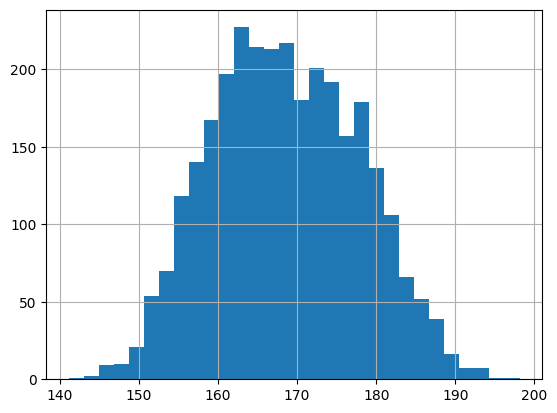

In [56]:
#
df_updated['Height (cm)'].hist(bins=30)

<Axes: >

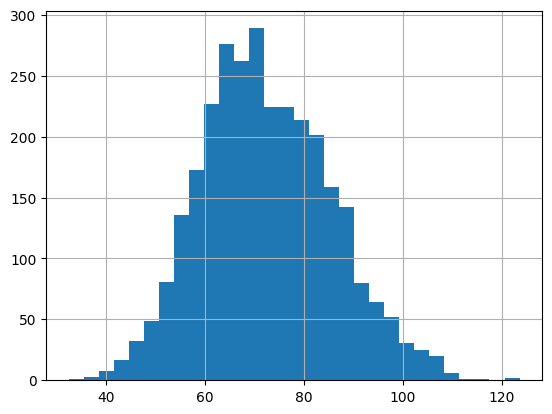

In [57]:
#
df_updated['Weight (kg)'].hist(bins=30)

<Axes: >

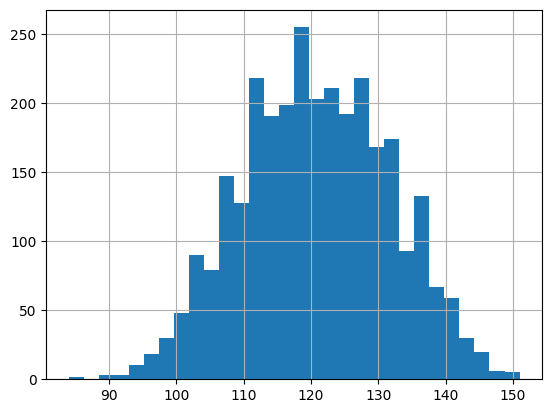

In [58]:
#
df_updated['Blood Pressure (s/d)'].hist(bins=30)

<Axes: >

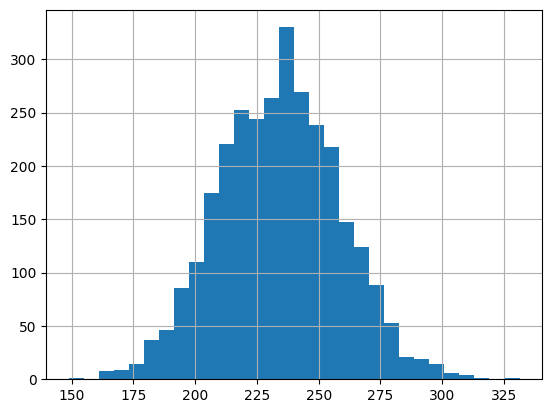

In [59]:
#
df_updated['Cholesterol Level (mg/dL)'].hist(bins=30)

<Axes: >

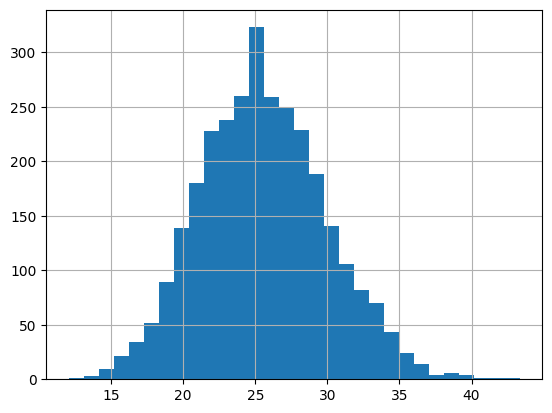

In [60]:
#
df_updated['BMI'].hist(bins=30)

<Axes: >

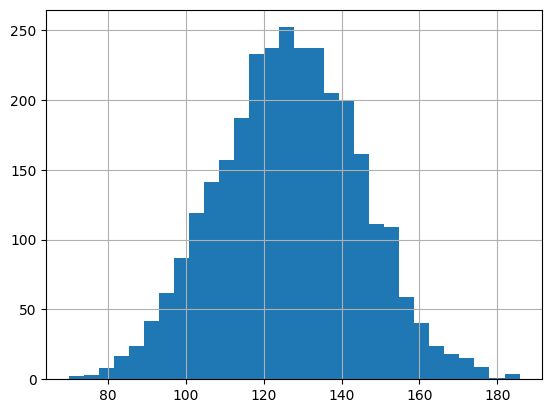

In [61]:
#
df_updated['Blood Glucose Level (mg/dL)'].hist(bins=30)

<Axes: >

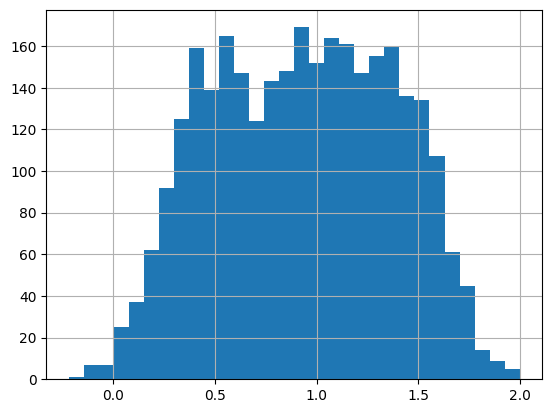

In [62]:
#
df_updated['Bone Density (g/cm²)'].hist(bins=30)

<Axes: >

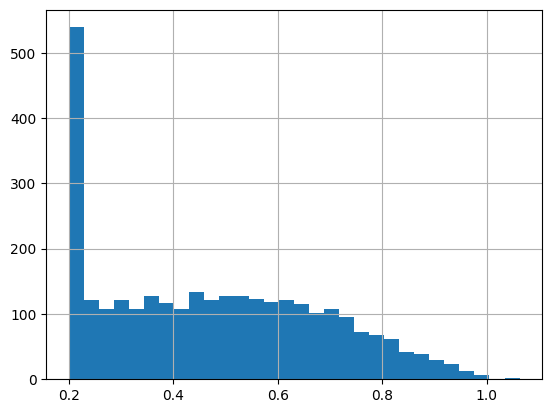

In [63]:
#
df_updated['Vision Sharpness'].hist(bins=30)

<Axes: >

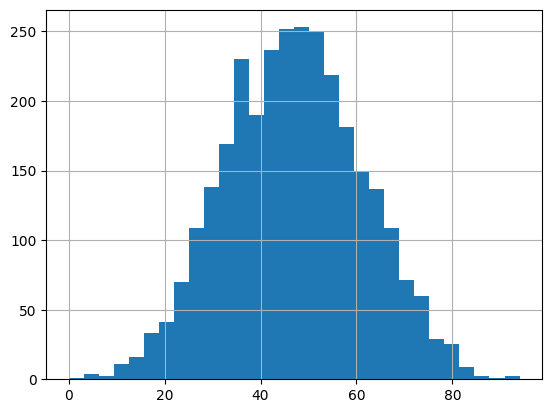

In [64]:
#
df_updated['Hearing Ability (dB)'].hist(bins=30)

<Axes: >

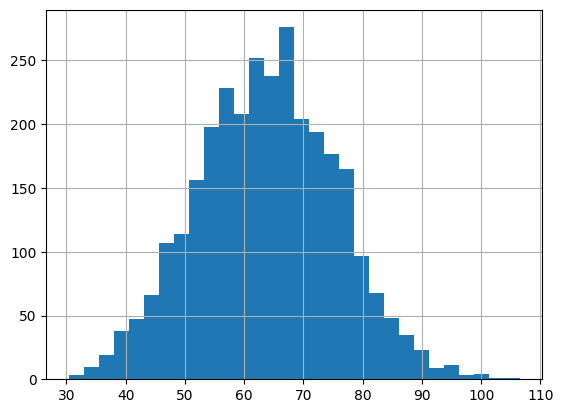

In [65]:
#
df_updated['Cognitive Function'].hist(bins=30)

<Axes: >

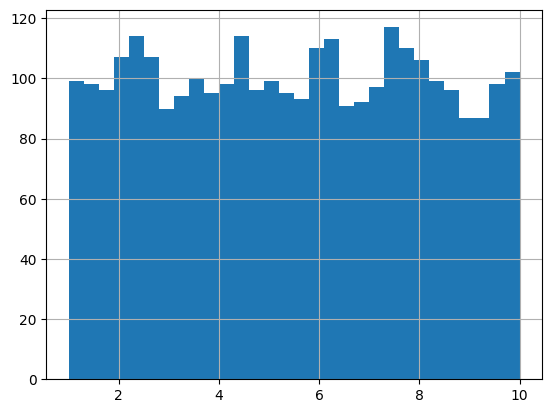

In [66]:
#
df_updated['Stress Levels'].hist(bins=30)

<Axes: >

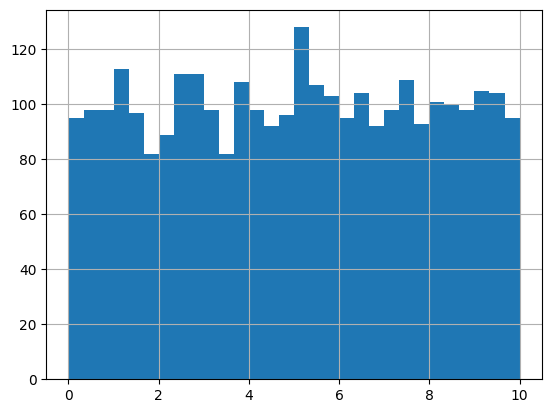

In [67]:
#
df_updated['Pollution Exposure'].hist(bins=30)

<Axes: >

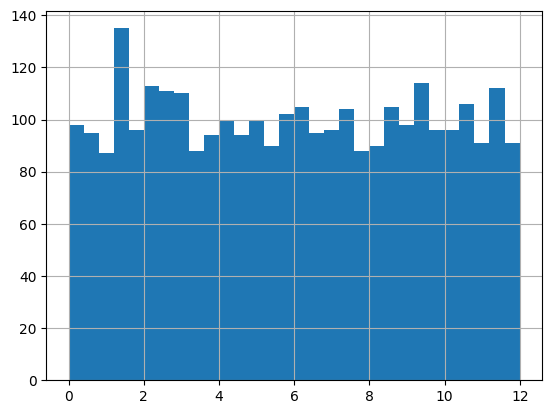

In [68]:
#
df_updated['Sun Exposure'].hist(bins=30)

<Axes: >

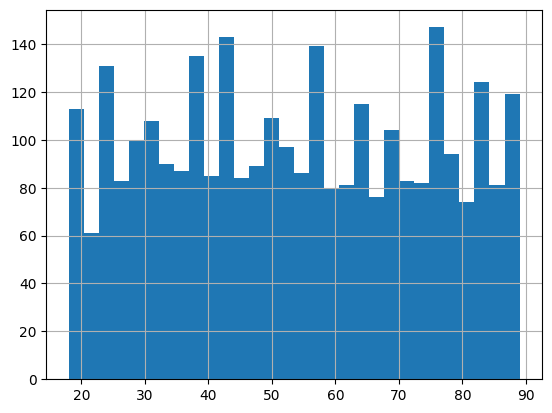

In [69]:
#
df_updated['Age (years)'].hist(bins=30)

Se concluye que el dataset inicialmente no contiene datos extremos que puedan llegar a afectar la precisión del modelo.

# Hallazgos

### Correlación

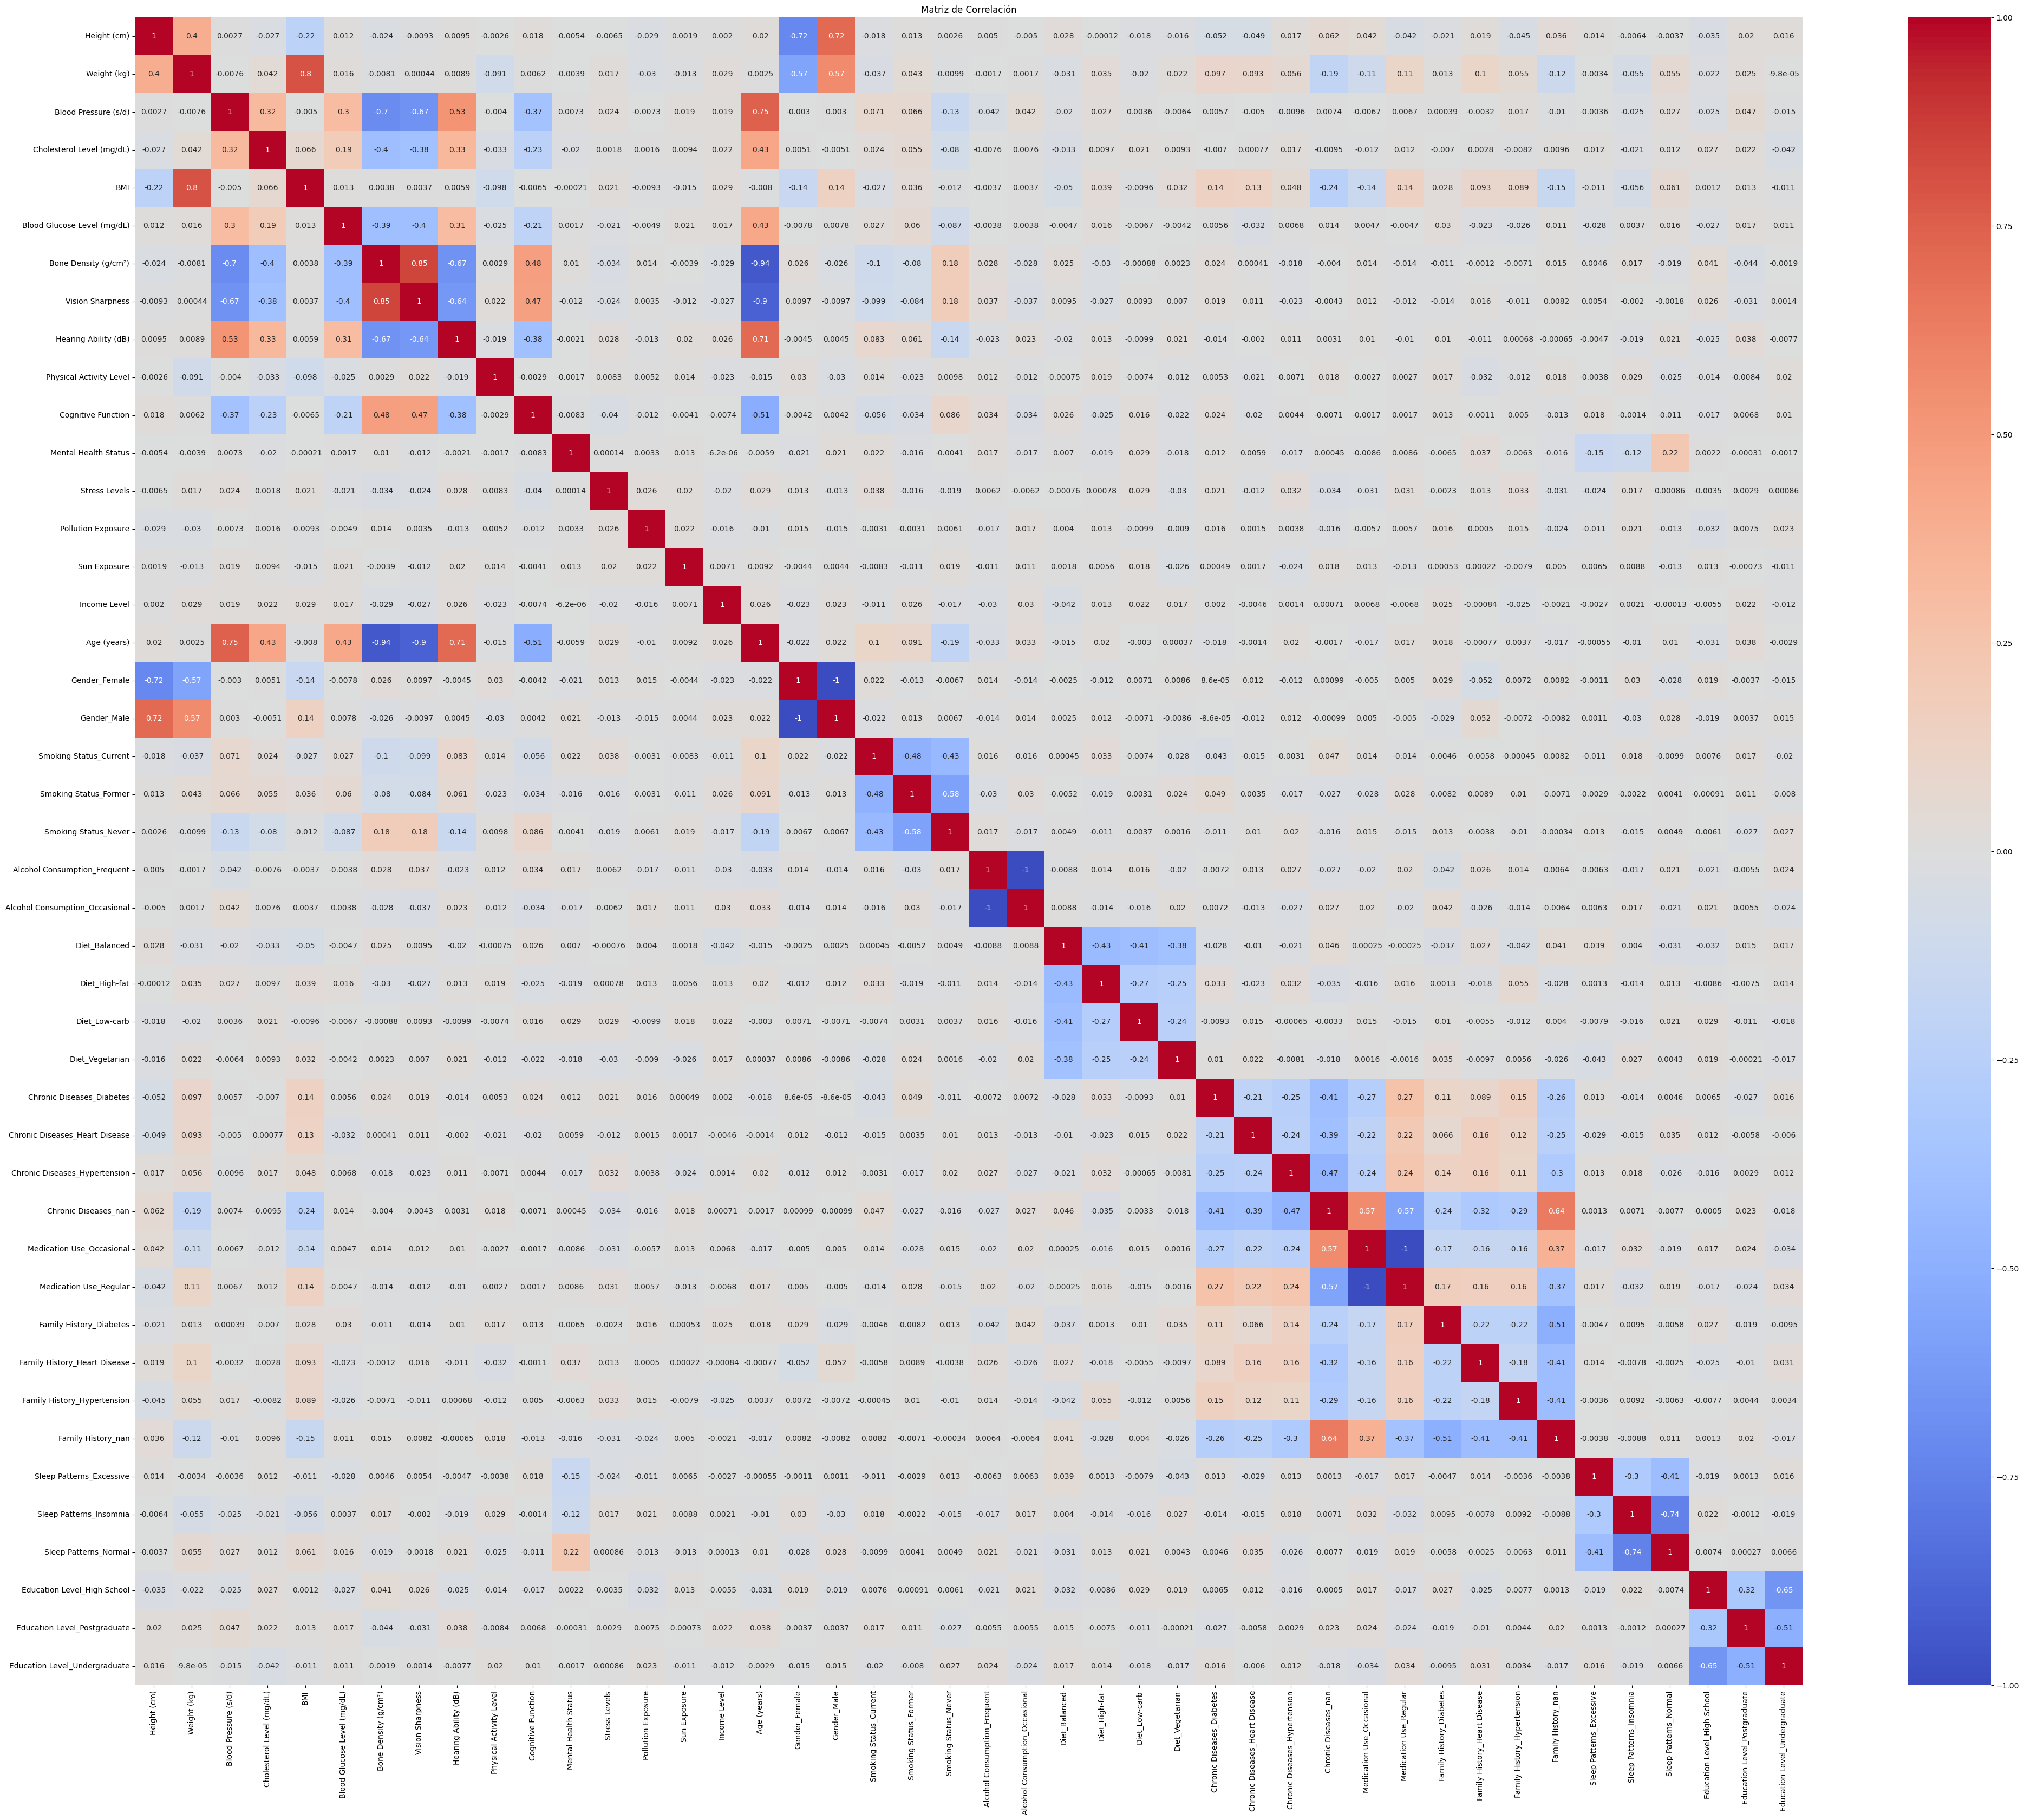

In [107]:
#
plt.figure(figsize=(50, 40))
#
sns.heatmap(df_updated.corr(), annot=True, cmap='coolwarm', square=True)
#
plt.title('Matriz de Correlación')
#
plt.show()

### Edad promedio de la muestra

In [71]:
#
df_updated['Age (years)'].describe()

,Age (years)
count,3000.000000
mean,53.485667
std,20.569690
min,18.000000
25%,36.000000
50%,53.000000
75%,72.000000
max,89.000000


In [72]:
#
px.histogram(df,x='Age (years)', color='Gender')

### Vision Sharpness

In [75]:
#
df_updated['Vision Sharpness'].describe()

,Vision Sharpness
count,3000.000000
mean,0.474591
std,0.209726
min,0.200000
25%,0.281671
50%,0.462070
75%,0.639498
max,1.062537


In [76]:
#
px.scatter(df_updated,x='Vision Sharpness',color='Age (years)')

In [77]:
#
df_updated['Hearing Ability (dB)'].describe()

,Hearing Ability (dB)
count,3000.000000
mean,47.016214
std,14.336464
min,0.000000
25%,36.734775
50%,46.963733
75%,56.828847
max,94.003824


In [78]:
#
px.scatter(df_updated,x='Hearing Ability (dB)',color='Age (years)')

### Diet

In [73]:
#
px.box(df, x='Diet', y='Age (years)')

In [74]:
#
lowcarb = df_updated[(df_updated['Diet_Low-carb'] == 1)]
#
balanced = df_updated[(df_updated['Diet_Balanced'] == 1)]
#
vegetarian = df_updated[(df_updated['Diet_Vegetarian'] == 1)]
#
highfat = df_updated[(df_updated['Diet_High-fat'] == 1)]

#
lowcarb_count = lowcarb.groupby('Age (years)').size().reset_index(name='Count')
#
balanced_count = balanced.groupby('Age (years)').size().reset_index(name='Count')
#
vegetarian_count = vegetarian.groupby('Age (years)').size().reset_index(name='Count')
#
highfat_count = highfat.groupby('Age (years)').size().reset_index(name='Count')

#
melted_df = pd.concat([lowcarb_count.assign(Diet='Low-carb'),balanced_count.assign(Diet='Balanced'),vegetarian_count.assign(Diet='Vegetarian'),highfat_count.assign(Diet='High-fat')], ignore_index=True)
#
px.line(melted_df, x='Age (years)', y='Count', color='Diet')

### Chronic Diseases

In [79]:
#
filter = df_updated[(df_updated['Chronic Diseases_Diabetes'] == 1)]
#
count_by_age = filter.groupby('Age (years)').size().reset_index(name='Count')
#
px.line(count_by_age, x='Age (years)', y='Count')

In [80]:
#
px.density_heatmap(count_by_age, x='Age (years)', y='Count')

In [84]:
#
lowcarb = filter[(df_updated['Diet_Low-carb'] == 1)]
#
balanced = filter[(df_updated['Diet_Balanced'] == 1)]
#
vegetarian = filter[(df_updated['Diet_Vegetarian'] == 1)]
#
highfat = filter[(df_updated['Diet_High-fat'] == 1)]

#
lowcarb_count = lowcarb.groupby('Age (years)').size().reset_index(name='Count')
#
balanced_count = balanced.groupby('Age (years)').size().reset_index(name='Count')
#
vegetarian_count = vegetarian.groupby('Age (years)').size().reset_index(name='Count')
#
highfat_count = highfat.groupby('Age (years)').size().reset_index(name='Count')

#
melted_df = pd.concat([lowcarb_count.assign(Diet='Low-carb'),balanced_count.assign(Diet='Balanced'),vegetarian_count.assign(Diet='Vegetarian'),highfat_count.assign(Diet='High-fat')], ignore_index=True)
#
px.histogram(melted_df, x='Age (years)', y='Count', color='Diet')

<ipython-input-84-01cd1f473904>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-84-01cd1f473904>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-84-01cd1f473904>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-84-01cd1f473904>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [106]:
px.scatter_3d(melted_df,y='Age (years)',x='Diet',z='Count',color='Diet',size='Count')

### Smoking Status

In [110]:
#
current_filter = df['Smoking Status'] == 'Current'
#
former_filter = df['Smoking Status'] == 'Former'
#
never_filter = df['Smoking Status'] == 'Never'

#
current_count = df_updated[current_filter].groupby('Age (years)').size().reset_index(name='Count')
#
former_count = df_updated[former_filter].groupby('Age (years)').size().reset_index(name='Count')
#
never_count = df_updated[never_filter].groupby('Age (years)').size().reset_index(name='Count')

#
melted_df = pd.concat([current_count.assign(Status='Current'),former_count.assign(Status='Former'),never_count.assign(Status='Never')], ignore_index=True)
#
px.line(melted_df, x='Age (years)', y='Count', color='Status')

In [82]:
#
px.histogram(melted_df, x='Age (years)', y='Count', color='Status')

### BMI

In [109]:
#
px.scatter(df_updated,color='Weight (kg)',y='BMI',x='Age (years)')